# Notebook 2 - Maximum Likelihood Estimation

In [1]:
#@title Imports
!pip install -q symbulate
from symbulate import *

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#@title Define Plotting Functions

def plot_discrete_function(f, xlim=(0, 10), xlabel=r"$\theta$", ylabel="Likelihood"):
    xs = np.arange(np.ceil(xlim[0]), np.floor(xlim[1]) + 1, dtype=int)
    ys = [f(x) for x in xs]
    plt.plot(xs, ys, "ko-")
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.xlim(*xlim)

def plot_continuous_function(f, xlim=(0, 1), xlabel=r"$\theta$", ylabel="Likelihood"):
    xs = np.linspace(xlim[0], xlim[1], 1000)
    ys = [f(x) for x in xs]
    plt.plot(xs, ys, "k-")
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.xlim(*xlim)

## Exer 2.1

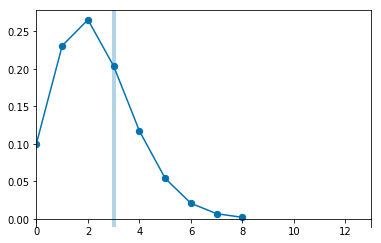

In [3]:
Poisson(2.3).plot()
Poisson(2.3).pmf(3)
plt.xlim(0, 13);
plt.axvline(3, 0, 1, alpha=.3, linewidth=4); # vertical line at x = 3

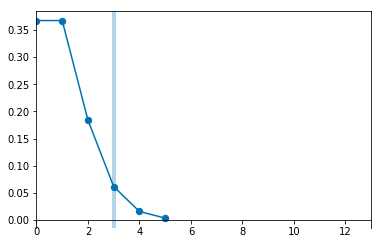

In [4]:
Poisson(1).plot()
Poisson(1).pmf(3)
plt.xlim(0, 13);
plt.axvline(3, 0, 1, alpha=.3, linewidth=4); # vertical line at x = 3

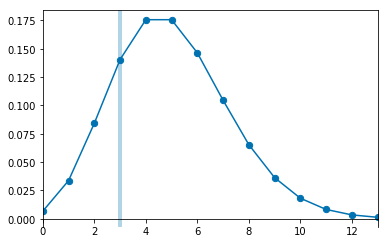

In [5]:
Poisson(5).plot()
Poisson(5).pmf(3)
plt.xlim(0, 13);
plt.axvline(3, 0, 1, alpha=.3, linewidth=4); # vertical line at x = 3

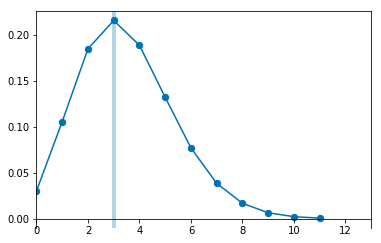

In [6]:
Poisson(3.5).plot()
Poisson(3.5).pmf(3)
plt.xlim(0, 13);
plt.axvline(3, 0, 1, alpha=.3, linewidth=4); # vertical line at x = 3

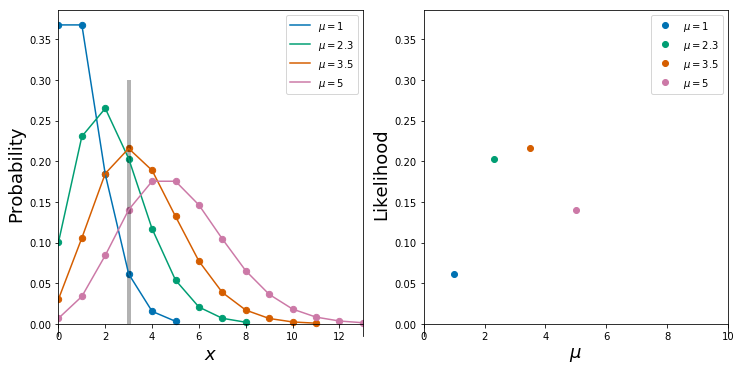

In [7]:
#@title From PMF to Likelihood: Single Observation
mus = [1, 2.3, 3.5, 5] #@param {type:"raw"}
x = 3 #@param {type:"raw"}

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ylim = (0, 0.30)
axes[0].set_ylim(ylim)

# draw plots
for mu in mus:
    Poisson(mu).plot(ax=axes[0])
    axes[1].plot([mu], Poisson(mu).pmf(x), 'o')
  
# make the right plot match the left plot
axes[1].set_xlim(0, 10)
axes[1].set_ylim(*axes[0].get_ylim())
axes[1].spines["bottom"].set_position("zero")
  
# draw vertical strip at x
axes[0].vlines(x, ylim[0], ylim[1], alpha=.3, linewidth=4)
  
# set legend
axes[0].legend(["$\mu=%s$" % mu for mu in mus])
axes[1].legend(["$\mu=%s$" % mu for mu in mus])

# set labels
axes[0].set_xlabel("$x$", fontsize=18)
axes[0].set_ylabel("Probability", fontsize=18)
axes[1].set_xlabel("$\mu$", fontsize=18)
axes[1].set_ylabel("Likelihood", fontsize=18);

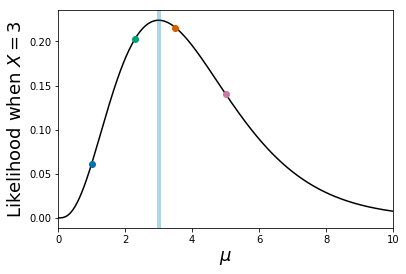

In [8]:
def likelihood(mu):
    return Poisson(mu).pmf(3)

plot_continuous_function(likelihood, xlim=(0.01, 10),
                         xlabel="$\mu$", ylabel="Likelihood when $X=3$")

plt.axvline(3, 0, 1, alpha=.3, linewidth=4); # vertical line at x = 3

# Add the colored points from before.
for mu in mus:
    plt.plot([mu], Poisson(mu).pmf(3), 'o')

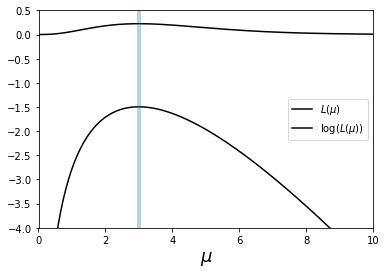

In [9]:
def loglikelihood(mu):
    return log(Poisson(mu).pmf(3))

plot_continuous_function(likelihood, xlim=(0.01, 10),
                         xlabel="$\mu$", ylabel="")

plot_continuous_function(loglikelihood, xlim=(0.01, 10),
                         xlabel="$\mu$", ylabel="")

plt.axvline(3, 0, 1, alpha=.3, linewidth=4); # vertical line at x = 3

plt.ylim(-4, 0.5)
plt.legend([r"$L(\mu)$", r"$\log(L(\mu))$"]);



## Exer 2.3 (Widget might not work in Colab)

In [10]:
from ipywidgets import interactive
import ipywidgets as widgets

def f(x):
    def likelihood(mu):
        return Poisson(mu).pmf(x)
    
    plot_continuous_function(likelihood, xlim=(0.01, 10),
                         xlabel="$\mu$", ylabel="$L(\mu)$ when $x=%s$" % x)
    
    plt.title("Poisson($\mu$): MLE of $\mu$ when $x=%s$ is " % x + "%s" % x)
    
    # draw vertical strip at x
    plt.axvline(x, 0, Poisson(x).pmf(x) if x > 0 else 1, alpha=.3, linewidth=4)
    plt.ylim(0, 1)
    plt.show()

interactive_plot = interactive(f, x=widgets.IntSlider(value=3, max=10, min=0))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=3, description='x', max=10), Output(layout=Layout(height='350px'))), _do…

## Exer 2.4

In [11]:
RV(Poisson(2.3) ** 3).sim(5)

0,"(2, 6, 2)"
1,"(2, 1, 0)"
2,"(1, 2, 3)"
3,"(2, 2, 1)"
4,"(2, 1, 1)"


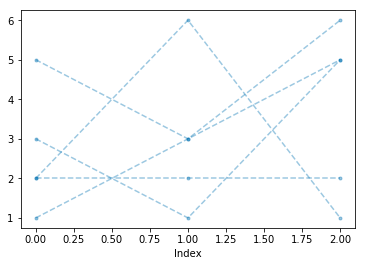

In [12]:
RV(Poisson(2.3) ** 3).sim(5).plot()

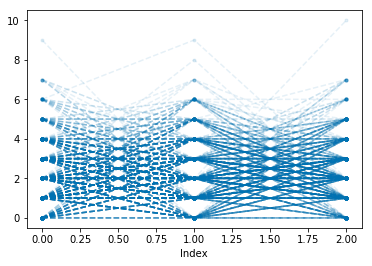

In [13]:
RV(Poisson(2.3) ** 3).sim(1000).plot()

In [14]:
RV(Poisson(2.3) ** 3).sim(10000).tabulate()

"(0, 0, 0)",8
"(0, 0, 1)",26
"(0, 0, 2)",27
"(0, 0, 3)",19
"(0, 0, 4)",13
"(0, 0, 5)",3
"(0, 0, 6)",2
"(0, 1, 0)",26
"(0, 1, 1)",35
"(0, 1, 2)",56
"(0, 1, 3)",44


In [15]:
RV(Poisson(2.3) ** 3).sim(10000).tabulate()[3, 0, 2] / 10000

0.0054

In [16]:
Poisson(2.3).pmf(3) * Poisson(2.3).pmf(0) * Poisson(2.3).pmf(2)

0.005405377243131984

In [17]:
mu = 2.3
Poisson(mu).pmf(3) * Poisson(mu).pmf(0) * Poisson(mu).pmf(2)

0.005405377243131984

In [18]:
mu = 1
Poisson(mu).pmf(3) * Poisson(mu).pmf(0) * Poisson(mu).pmf(2)

0.004148922363988662

In [19]:
mu = 5
Poisson(mu).pmf(3) * Poisson(mu).pmf(0) * Poisson(mu).pmf(2)

7.966206263068374e-05

In [20]:
mu = 3.5
Poisson(mu).pmf(3) * Poisson(mu).pmf(0) * Poisson(mu).pmf(2)

0.0012052216255760433

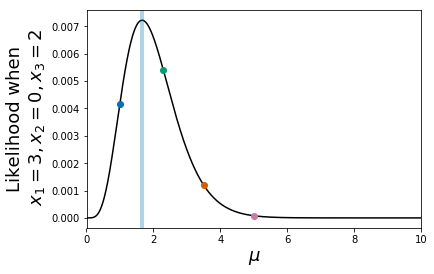

In [21]:
mus = [1, 2.3, 3.5, 5]

def likelihood(mu):
    return Poisson(mu).pmf(3) * Poisson(mu).pmf(0) * Poisson(mu).pmf(2)

plot_continuous_function(likelihood, xlim=(0.01, 10),
                         xlabel="$\mu$", ylabel="Likelihood when\n $x_1=3, x_2=0, x_3=2$")

plt.axvline(5 / 3, 0, 1, alpha=.3, linewidth=4); # vertical line at xbar

# Add the colored points from before.
for mu in mus:
    plt.plot([mu], likelihood(mu), 'o')

## Exer 2.7

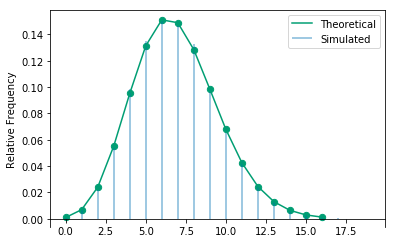

In [22]:
T = RV(Poisson(2.3) ** 3, sum)
T.sim(10000).plot()
Poisson(2.3 * 3).plot()
plt.legend(["Theoretical", "Simulated"]);

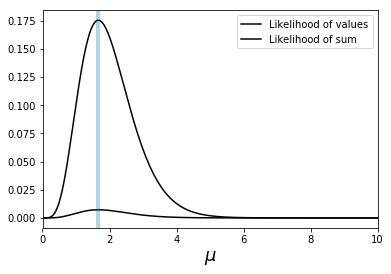

In [23]:
def likelihood_of_values(mu):
    return Poisson(mu).pmf(3) * Poisson(mu).pmf(0) * Poisson(mu).pmf(2)

def likelihood_of_sum(mu):
    return Poisson(3 * mu).pmf(3 + 0 + 2)

plot_continuous_function(likelihood_of_values, xlim=(0.01, 10),
                         xlabel="$\mu$", ylabel="")

plot_continuous_function(likelihood_of_sum, xlim=(0.01, 10),
                         xlabel="$\mu$", ylabel="")

plt.axvline(5 / 3, 0, 1, alpha=.3, linewidth=4); # vertical line at x = 3

plt.legend([r"Likelihood of values", r"Likelihood of sum"]);

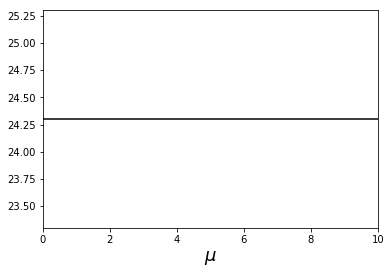

In [24]:
def ratio_of_likelihoods(mu):
    return likelihood_of_sum(mu) / likelihood_of_values(mu)

plot_continuous_function(ratio_of_likelihoods, xlim=(0.01, 10),
                         xlabel="$\mu$", ylabel="")

plt.ylim((3 ** 5 / factorial(5)) * factorial(3)*factorial(2) - 1, (3 ** 5 / factorial(5)) * factorial(3)*factorial(2) + 1);

## Widget might not work in Colab

In [25]:
from ipywidgets import interactive
import ipywidgets as widgets

def f(t, n):
    def likelihood(mu):
        return Poisson(mu * n).pmf(t)
    
    plot_continuous_function(likelihood, xlim=(0.01 , 10),
                         xlabel="$\mu$", ylabel="$L(\mu)$ when $T=%s$" % t)
    
    xbar = t / n
    
    plt.title("Poisson($\mu$): MLE of $\mu$ when $n=%s$" % n + " and $T=%s$" % t + r" is $\bar{x}=%s$" % round(xbar, 2))
    
    # draw vertical strip at xbar
    plt.axvline(t / n, 0, Poisson(t).pmf(t) if t > 0 else 1, alpha=.3, linewidth=4)
    plt.ylim(0, 1)
    plt.show()

interactive_plot = interactive(f, t=widgets.IntSlider(value=5, max=10, min=0), n=widgets.IntSlider(value=3, max=10, min=1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=5, description='t', max=10), IntSlider(value=3, description='n', max=10,…

## Exer 2.8

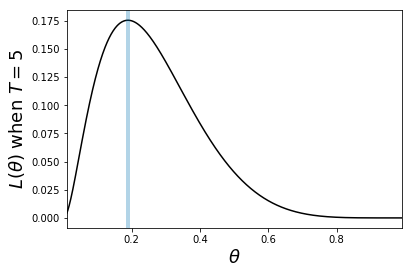

In [26]:
def likelihood(theta):
    return Poisson(3 * (-log(theta))).pmf(5)

plot_continuous_function(likelihood, xlim=(0.01, 0.99),
                         xlabel=r"$\theta$", ylabel=r"$L(\theta)$ when $T=5$")

plt.axvline(exp(-5 / 3), 0, 1, alpha=.3, linewidth=4); # vertical line at exp(-xbar)